In [21]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
import seaborn as sns
import os
import pickle
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [22]:
from keras.datasets import cifar10

In [23]:
(xtr,ytr),(xts,yts)=cifar10.load_data()

In [24]:
xtr.shape

(50000, 32, 32, 3)

In [25]:
ytr.shape

(50000, 1)

In [26]:
ytr=ytr.reshape((ytr.shape[0]))

In [27]:
ytr.shape

(50000,)

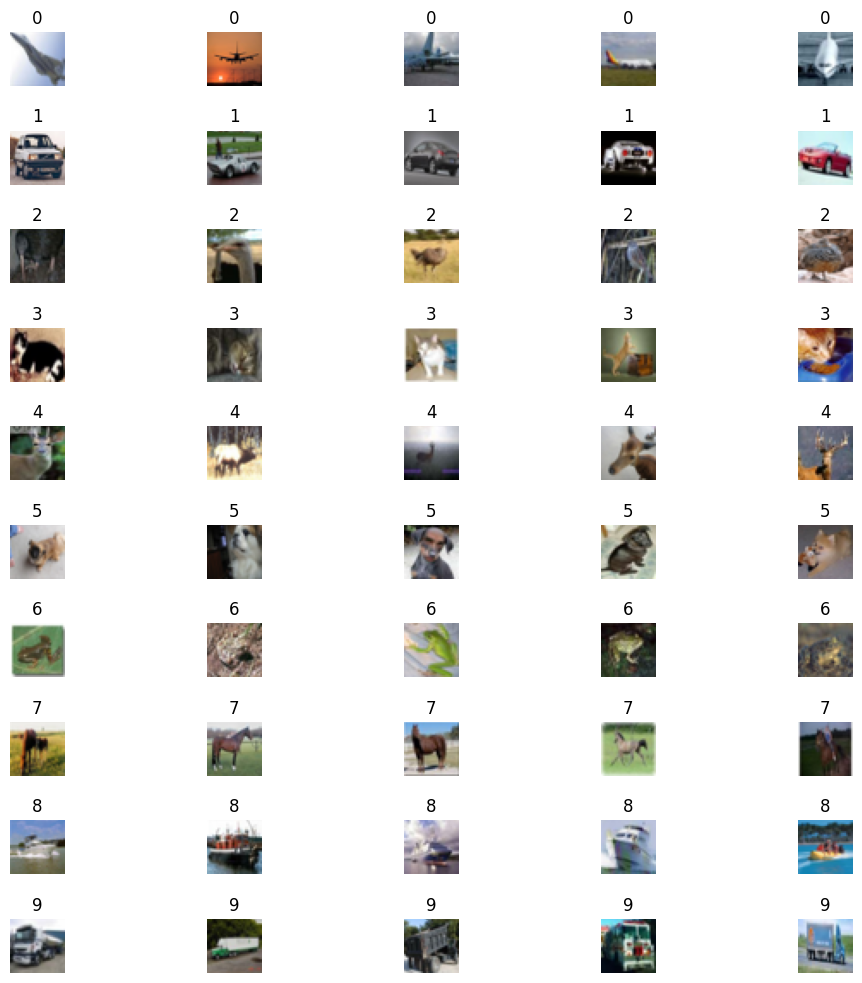

In [28]:
ncols=5
nclasses=10
fig,axes=plt.subplots(ncols=ncols,nrows=nclasses,figsize=(10,10))
fig.tight_layout()
for i in range(ncols):
  for j in range(nclasses):
    x_selected= xtr[ytr==j]
    axes[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],
                      cmap=plt.get_cmap("gray"))

    axes[j][i].axis("off")
    axes[j][i].set_title(str(j))
plt.show()

In [29]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

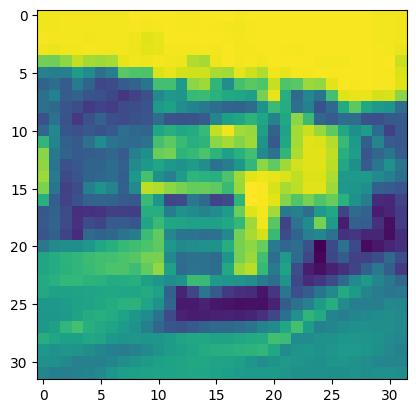

In [30]:
img=grayscale(xtr[1000])
plt.imshow(img)

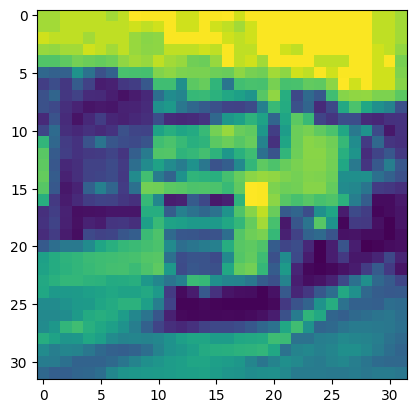

In [31]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)

In [32]:
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [33]:
xtr=np.array(list(map(preprocess,xtr)))
xts=np.array(list(map(preprocess,xts)))

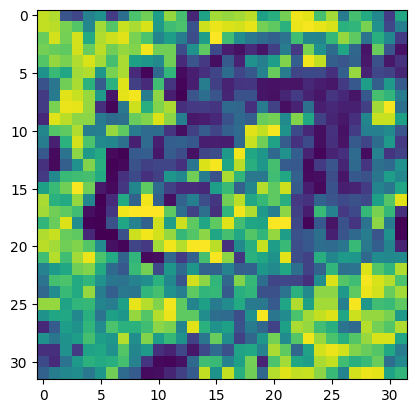

In [34]:
plt.imshow(xtr[random.randint(0,len(xtr)-1)])

In [35]:
xtr=xtr.reshape(xtr.shape[0],32,32,1)
xts=xts.reshape(xts.shape[0],32,32,1)

In [36]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.2,
                           zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [37]:
datagen.fit(xtr)

In [38]:
batches=datagen.flow(xtr,ytr,batch_size=15)
X_batch,y_batch=next(batches)

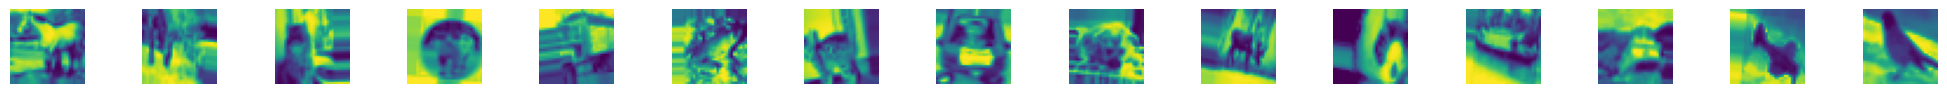

In [39]:
fig,axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [40]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [41]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(100,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(100,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(50,(3,3),activation='relu'))
  model.add(Conv2D(50,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [42]:
model=modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 100)       2600      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 100)       250100    
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 100)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 50)        45050     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 50)          22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                   

In [43]:
h=model.fit_generator(datagen.flow(xtr,ytr,batch_size=50),steps_per_epoch=500,
                      epochs=50,validation_data=(xts,yts),shuffle='True')

<ipython-input-43-07e1788fcf57>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h=model.fit_generator(datagen.flow(xtr,ytr,batch_size=50),steps_per_epoch=500,


Epoch 1/50
500/500 [==============================] - 21s 28ms/step - loss: 2.1298 - accuracy: 0.1941 - val_loss: 1.9215 - val_accuracy: 0.2871
Epoch 2/50
500/500 [==============================] - 13s 26ms/step - loss: 1.8919 - accuracy: 0.3073 - val_loss: 1.6830 - val_accuracy: 0.3867
Epoch 3/50
500/500 [==============================] - 12s 25ms/step - loss: 1.7350 - accuracy: 0.3738 - val_loss: 1.4835 - val_accuracy: 0.4710
Epoch 4/50
500/500 [==============================] - 12s 25ms/step - loss: 1.6296 - accuracy: 0.4205 - val_loss: 1.3959 - val_accuracy: 0.4963
Epoch 5/50
500/500 [==============================] - 12s 24ms/step - loss: 1.5478 - accuracy: 0.4514 - val_loss: 1.3223 - val_accuracy: 0.5329
Epoch 6/50
500/500 [==============================] - 14s 27ms/step - loss: 1.4810 - accuracy: 0.4742 - val_loss: 1.2963 - val_accuracy: 0.5364
Epoch 7/50
500/500 [==============================] - 13s 25ms/step - loss: 1.4327 - accuracy: 0.4882 - val_loss: 1.2215 - val_accuracy:

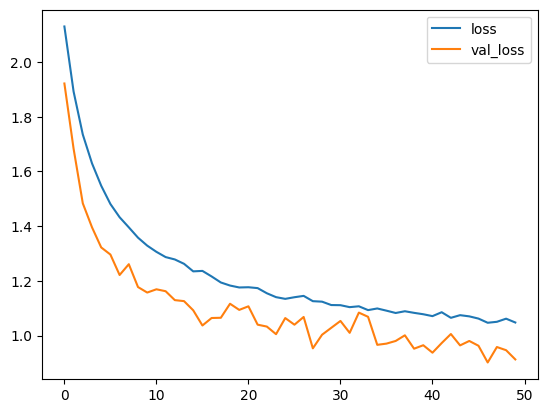

In [44]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
d=list(upload.keys())[0]
print(d)

car.jpeg


[255 216 255 ...  31 255 217]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


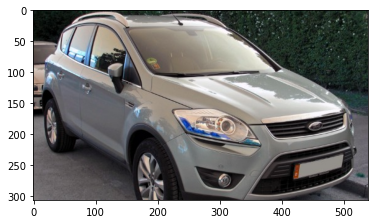

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

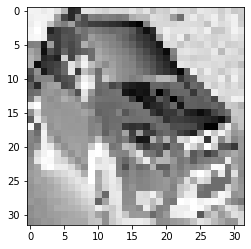

In [ ]:
img=cv2.resize(img,(32,32))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=img/255
img=img.reshape(1,32,32,1)
prediction=model.predict_classes(img)
print(str(prediction))

[6]
